# Figure 4H, I

### Import packages

In [1]:
import ABCParse
import adata_query
import cellplots as cp
import larry
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scdiffeq as sdq

cmap = larry.pl.InVitroColorMap()._dict

### Load data

Reference `adata`:

In [2]:
h5ad_path = "/home/mvinyard/data/adata.reprocessed_19OCT2023.more_feature_inclusive.h5ad"
adata = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'


Simulated `adata_sim`

In [3]:
h5ad_path = "/home/mvinyard/experiments/LARRY.full_dataset/v1/simulated/version_3/adata_19977.h5ad"
adata_sim = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 82000 × 50
    obs: 't', 'z0_idx', 'sim_i', 'sim', 'state', 'fate', 'drift', 'diffusion'
    uns: 'fate_counts', 'h5ad_path', 'sim_idx', 'simulated'
    obsm: 'X_diffusion', 'X_drift'


### Load UMAP, PCA, and Scaling model

In [4]:
UMAP = sdq.io.read_pickle("/home/mvinyard/data/umap_model.pkl")
PCA = sdq.io.read_pickle("/home/mvinyard/data/pca_model.pkl")
SCALER = sdq.io.read_pickle("/home/mvinyard/data/scaler_model.pkl")

### Annotate genes, scale predicted expression

In [5]:
sdq.tl.annotate_gene_features(adata_sim=adata_sim, adata=adata, PCA=PCA)
sdq.tl.invert_scaled_gex(adata_sim=adata_sim, scaler_model=SCALER)
X_gene_inv = adata_query.fetch(adata_sim, key="X_gene_inv", groupby=["fate", "t"])

 - [INFO] | Gene names added to: `adata_sim.uns['gene_ids']`
 - [INFO] | Inverted expression added to: `adata_sim.obsm['X_gene']`


### Transform the data and update `adata` object

In [6]:
adata_sim.obsm['X_umap'] = UMAP.transform(adata_sim.X)

In [7]:
def plot_umap_single_gene(adata, adata_sim, gene):
    
    fig, axes = cp.plot(nplots = 2, ncols=2, height = 1, width = 1, delete='all', del_xy_ticks=[True])
    _axes = cp.umap_manifold(adata, ax = axes[0], groupby="Cell type annotation", c_background=cmap, s_background=50, s_cover=30)
    _axes = cp.umap_manifold(adata_sim, ax = axes[0], s_background=50, s_cover=30, clean_stdev=None)
    c = adata_sim.obsm['X_gene_inv'][gene]
    xu = adata_sim.obsm['X_umap']
    c_idx = np.argsort(c)
    xu_init = adata_sim[adata_sim.obs['t'] == 2].obsm['X_umap'].mean(0)
    img = axes[0].scatter(
        xu[c_idx, 0],
        xu[c_idx, 1],
        c=c[c_idx],
        s=25,
        zorder=201,
        cmap = "Purples",
        rasterized=True,
        alpha=0.5,
        ec="None",
    )
    colors, sizes = ["k", "w", "r"], [80, 60, 20]
    for i in range(3):
        axes[0].scatter(
            xu_init[0],
            xu_init[1],
            c=colors[i],
            s=sizes[i],
            zorder=301 + i,
            rasterized=True,
            ec="None",
        )
    plt.colorbar(mappable=img, ax=axes[1], location="left", shrink = 0.6)
    plt.savefig(f"Figure4HI.{gene}.svg")

### Plot UMAP: *Gfi1*

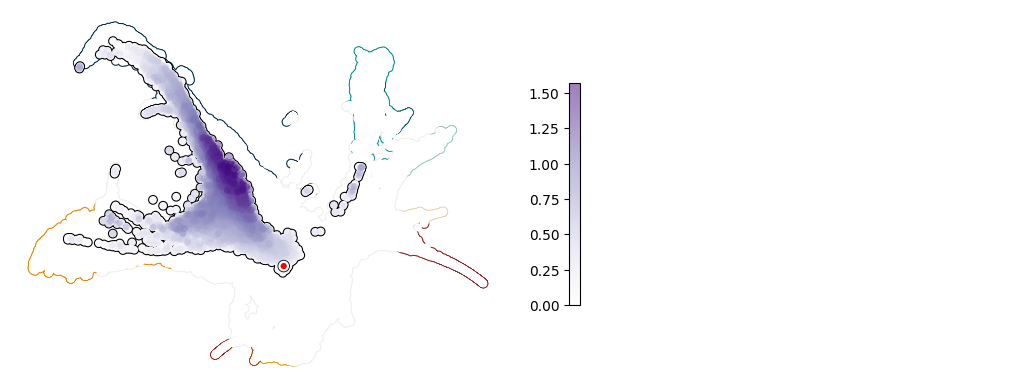

In [8]:
plot_umap_single_gene(adata, adata_sim, gene = "Gfi1")

### Plot UMAP: *Spi1*

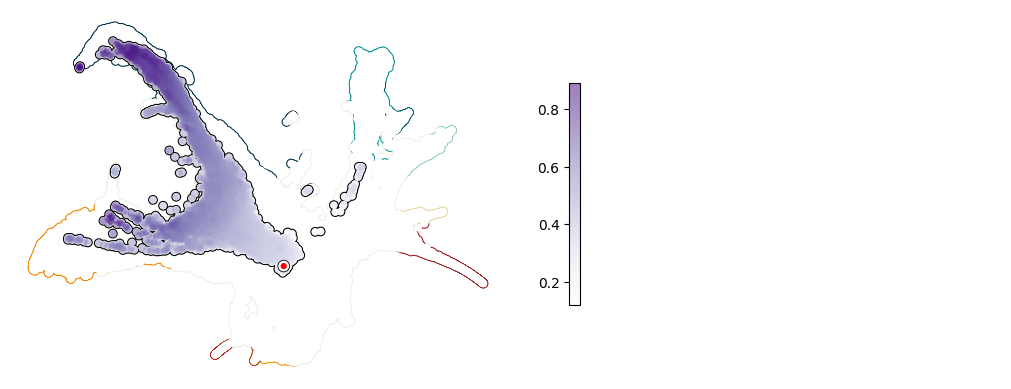

In [9]:
plot_umap_single_gene(adata, adata_sim, gene = "Spi1")

### Plot UMAP: *Klf4*

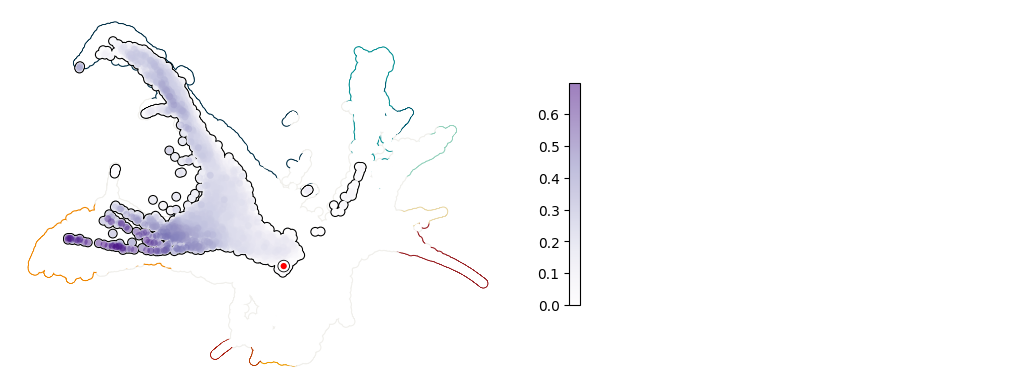

In [10]:
plot_umap_single_gene(adata, adata_sim, gene = "Klf4")

### Plot UMAP: *Irf8*

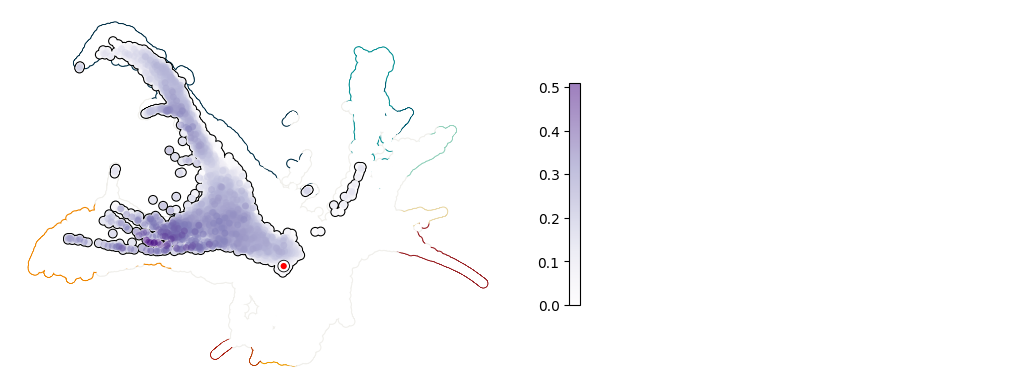

In [11]:
plot_umap_single_gene(adata, adata_sim, gene = "Irf8")